In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("heart.csv")

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [3]:
data.head(15)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [6]:
data.value_counts()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  caa  thall  output
38   1    2   138     175   0    1        173       0     0.0      2    4    2      1         2
77   1    0   125     304   0    0        162       1     0.0      2    3    2      0         1
51   0    2   130     256   0    0        149       0     0.5      2    0    2      1         1
              140     308   0    0        142       0     1.5      2    1    2      1         1
     1    0   140     261   0    0        186       1     0.0      2    0    2      1         1
                                                                                             ..
59   1    0   138     271   0    0        182       0     0.0      2    0    2      1         1
              140     177   0    1        162       1     0.0      2    1    3      0         1
              164     176   1    0        90        0     1.0      1    2    1      0         1
              170     326   0    0        140

In [7]:
import matplotlib.pyplot as plt

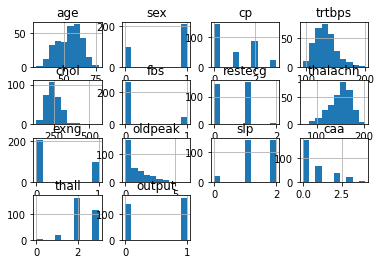

In [8]:
data.hist()
plt.show()

In [9]:
import seaborn as sns

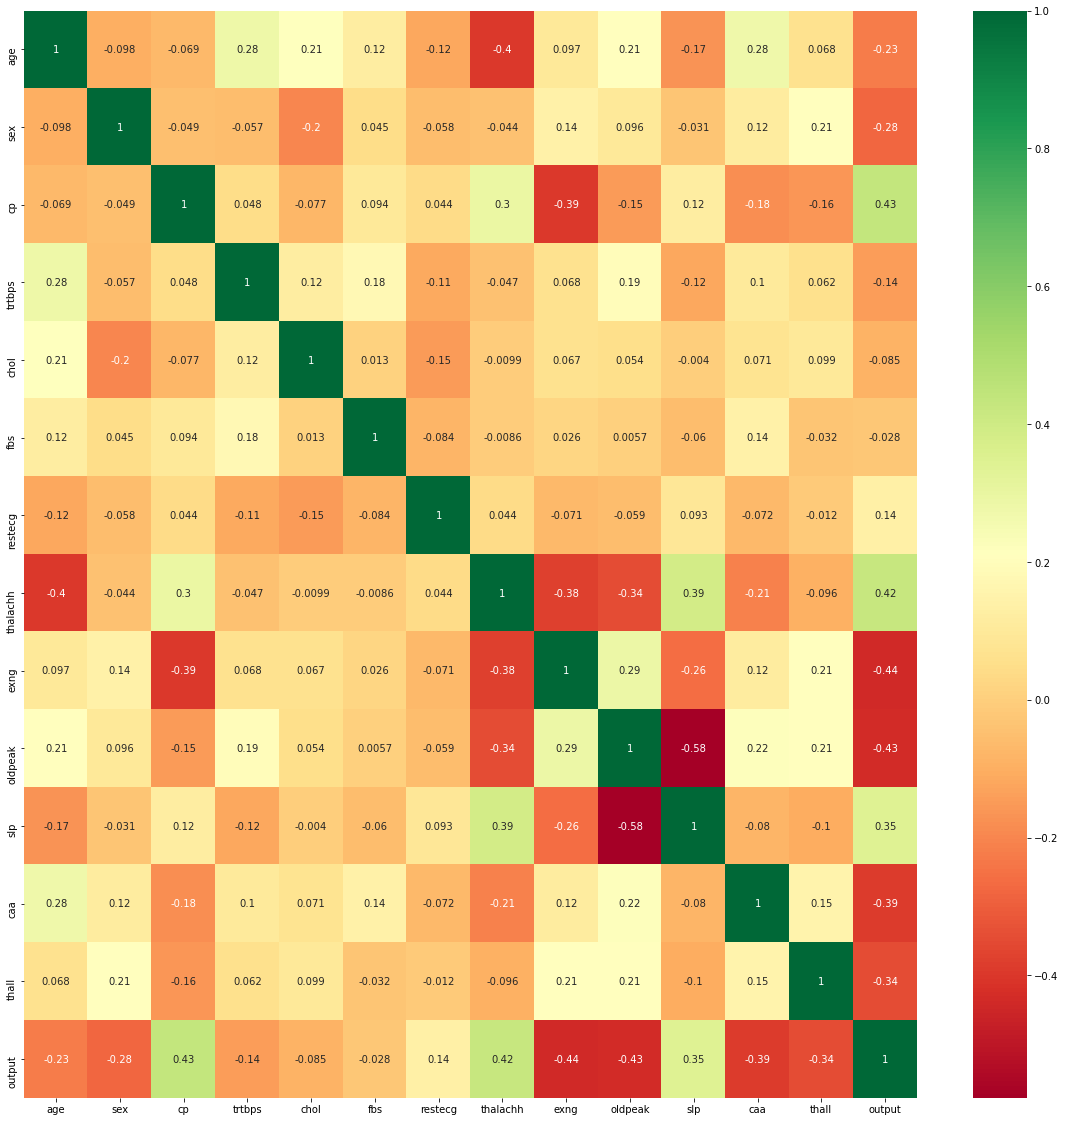

In [10]:
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

[0.07442112 0.05232122 0.1161846  0.06546234 0.05854159 0.01808894
 0.03680245 0.08393281 0.10931804 0.0821504  0.06837121 0.1251949
 0.10921037]


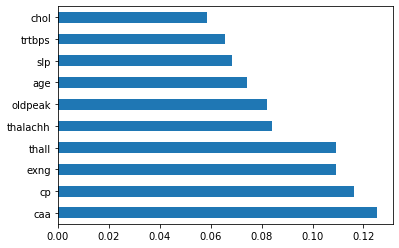

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [12]:
X.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [13]:
X = X.drop(['age', 'sex', 'slp', 'trtbps', 'chol'], axis = 1)

In [14]:
X.head(5)

,cp,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,3,1,0,150,0,2.3,0,1
1,2,0,1,187,0,3.5,0,2
2,1,0,0,172,0,1.4,0,2
3,1,0,1,178,0,0.8,0,2
4,0,0,1,163,1,0.6,0,2


In [15]:
X = X.drop(['restecg'], axis = 1)

In [16]:
X.head(2)

,cp,fbs,thalachh,exng,oldpeak,caa,thall
0,3,1,150,0,2.3,0,1
1,2,0,187,0,3.5,0,2


In [17]:
y.head(2)

0    1
1    1
Name: output, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
X_train

,cp,fbs,thalachh,exng,oldpeak,caa,thall
37,2,0,165,0,1.6,0,3
16,2,0,172,0,0.0,0,2
126,0,0,143,0,0.1,0,2
291,0,0,140,0,4.4,3,1
273,0,0,156,0,0.1,1,3
...,...,...,...,...,...,...,...
188,2,0,163,0,0.6,1,3
71,2,0,154,1,0.0,1,3
106,3,1,131,0,0.1,1,2
270,0,0,144,0,0.8,0,3


In [21]:
X_test

,cp,fbs,thalachh,exng,oldpeak,caa,thall
179,0,0,112,1,0.6,1,1
228,3,0,159,0,0.2,0,3
111,2,1,173,0,0.2,1,3
246,0,0,150,1,1.9,2,3
60,2,1,130,0,0.0,1,2
...,...,...,...,...,...,...,...
163,2,0,173,0,0.0,4,2
155,0,0,131,0,0.6,0,2
97,0,1,147,0,0.1,3,3
68,1,0,170,0,0.0,0,2


In [22]:
y_train

37     1
16     1
126    1
291    0
273    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: output, Length: 203, dtype: int64

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logisticRegr = LogisticRegression()
model = logisticRegr.fit(X_train, y_train)

In [25]:
score = model.score(X_test, y_test)
print("Accuracy is ", score*100, "%")

Accuracy is  80.0 %


In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn import metrics

In [28]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

80.0

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf = GridSearchCV(model, parameters)

In [31]:
clf.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__C': 1.0,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 100,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(),
 'iid': 'deprecated',
 'n_jobs': None,
 'param_grid': {'kernel': ('linear', 'rbf'), 'C': [1, 10]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [32]:
print(y_pred, list(y_test))

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0] [0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
